# data/mc comparison as a function of all observables used for event selection cuts

In [1]:
import sys; sys.path.insert(0, '../../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/'

In [3]:
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_on_beam.csv and found the file...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_genie_CC1p.csv and found the file...
9538 selected CC1p events overlay


# apply the efficiency weights - if they were not computed yet

In [8]:
if ("Pmu weight" not in selected_beam_on.columns):    
    print 'no Pmu weights, computing them'
    compute_eff_weights(   beam_on=selected_beam_on,beam_off=selected_beam_off,                       
                           generated_CC1p=genie_CC1p,                       
                           selected_CC1p=selected_CC1p,overlay=selected_overlay_concat)         
    save_selected_samples(selected_overlay_concat , selected_CC1p , selected_beam_on , selected_beam_off)
    print 'done assiging Pmu weights and saving the files.'
else:
     print 'Pmu weights already exist'

Pmu weights already exist


In [9]:
if ("Pp weight" not in selected_beam_on.columns):    
    print 'no Pp weights, computing them'
    compute_eff_weights( beam_on=selected_beam_on,beam_off=selected_beam_off,                       
                         generated_CC1p=genie_CC1p,                       
                         selected_CC1p=selected_CC1p,overlay=selected_overlay_concat
                        ,ob_1='Pp',ob_2='cos(theta(p))',ob_3='phi(p)'                       
                        ,reco_1='reco_Pp',reco_2='reco_Pp_cos_theta',reco_3='reco_Pp_phi'                       
                        ,true_1='truth_Pp',true_2='truth_Pp_cos_theta',true_3='truth_Pp_phi')     
    save_selected_samples(selected_overlay_concat , selected_CC1p , selected_beam_on , selected_beam_off)
    print 'done assiging Pp weights and saving the files.'
else:
     print 'Pp weights already exist'

Pp weights already exist


## get the cross-section with and without the last bin of $\cos\theta_{\mu}$, as a function of an observable used for event selection cuts

In [239]:
def get_Xsec_variable(debug=0,
                      var='reco_Pt',mul=1,bins=linspace(0,1,5),
                      wname='Pmu weight',                       
                      do_corr_phi_0=True, remove_last_cos_theta_mu_bin=True,            
                      selected_beam_on=None,selected_beam_off=None,        
                      selected_overlay_concat=None,selected_CC1p=None):#{

    Xsec_dict = dict()
    beam_on, beam_off, overlay, CC1p = selected_beam_on,selected_beam_off,selected_overlay_concat,selected_CC1p
    if remove_last_cos_theta_mu_bin:#{
        beam_on = beam_on[beam_on['reco_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        beam_off = beam_off[beam_off['reco_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        overlay = overlay[overlay['reco_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        CC1p = CC1p[CC1p['reco_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
    #}
    h = get_Xsec_1d(beam_on,beam_off,overlay,CC1p
                    ,var=var,bins=bins,bin_width=bins[1]-bins[0]
                    ,wname=wname,mul=mul
                    ,do_corr_phi_0=do_corr_phi_0,debug=debug)
    if debug>1:  pp.pprint(h)
    Xsec_dict[var] = h['Xsec']
    Xsec_dict[var+' err'] = h['Xsec err']
    Xsec_dict['mc '+var] = h['mc Xsec']
    Xsec_dict['mc '+var+' err'] = h['mc Xsec err']
    #}
    return Xsec_dict


def draw_Xsec_variable(debug=0,
                       var='reco_Pt',mul=1,bins=linspace(0,1,5),vlabel='p_T',units=None,legend_loc='best',
                       wname='Pmu weight',
                       do_corr_phi_0=True,
                       selected_beam_on=None,selected_beam_off=None,
                       selected_overlay_concat=None,selected_CC1p=None,
                       filename=None,extra_name='',
                      residuals_ylim=[-1,1],residuals_yticks=[-0.5,0,0.5],residuals_ytitle=1.05):#{
    
    Xsec_w_costhetamu = get_Xsec_variable(debug=debug,                
                                  var=var,mul=mul,bins=bins,
                                  wname=wname,
                                  do_corr_phi_0=do_corr_phi_0, remove_last_cos_theta_mu_bin=False,            
                                  selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                                  selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p)

    Xsec_wo_costhetamu = get_Xsec_variable(debug=debug,                
                                  var=var,mul=mul,bins=bins,
                                  wname=wname,
                                  do_corr_phi_0=do_corr_phi_0, remove_last_cos_theta_mu_bin=True,            
                                  selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                                  selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p)
    
    fig=plt.figure(figsize=(20,8))
    mid = 0.5*(bins[1:]+bins[:-1]); bin_width=mid[1]-mid[0]
    for iXsec,(Xsec_dict,Xsec_title,iax) in enumerate(zip([Xsec_w_costhetamu,Xsec_wo_costhetamu]                                                       
                                                          ,[r'with last $\cos\theta_\mu$ bin',r'excluding last $\cos\theta_\mu$ bin']
                                                          ,[(1,3),(2,4)]
                                                     )):
        h = dict()
        ax = fig.add_subplot(3,2,iax)
        h['Xsec'],h['Xsec err'] = Xsec_dict[var],Xsec_dict[var+' err']
        plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data')
        h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+var], Xsec_dict['mc '+var+' err']
        ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 
        set_axes(ax,x_label=''
                 ,y_label=(r'$\frac{d\sigma}{d'+vlabel+'}$'
                           +(r'$\left[10^{-39} \frac{cm^{2}}{%s}\right]$'%units if units is not None
                             else r'$\left[10^{-39}cm^{2}\right]$')
                          ) 
                 ,do_add_grid=True,remove_ticks_x=True,do_add_legend=True if iXsec==1 else False, legend_loc=legend_loc
                 ,ylim=(0,1.1*np.max(ax.get_ylim())),title=Xsec_title)
        
        # residuals plot
        den, den_err = h['Xsec']-h['mc Xsec'],np.sqrt(np.square(h['Xsec err'])+np.square(h['mc Xsec err']))
        num, num_err = h['Xsec'],h['mc Xsec err']
        ratio = den/num
        ax = fig.add_subplot(3,2,5+iXsec)
        ratio_err = ratio*np.sqrt(np.square(den_err/den) + np.square(num_err/num))
        plt.errorbar(x=mid,xerr=0.5*bin_width,y=ratio,yerr=ratio_err,fmt='o',markersize=0,color='black')
        chi2,ndf = chi2_two_data_curves(h1=h['Xsec'],h1err=h['Xsec err'],h2=h['mc Xsec'],h2err=h['mc Xsec err'],bins=bins,debug=debug)
        set_axes(ax
                 ,x_label=('$'+vlabel+'$') + (" [%s]"%units if units is not None else '')
                 ,y_label=r'(data-mc)/data',do_add_grid=True
                 ,ylim=residuals_ylim,yticks=residuals_yticks)
        plt.plot([np.min(bins),np.max(bins)],[0,0],'--',color='royalblue')            
        plt.title(r'$\chi^2/ndf=%.2f/%d$'%(chi2,ndf), fontsize=20,y=residuals_ytitle)
    plt.tight_layout(h_pad=0.0)
    plt.subplots_adjust(hspace=0.05)
    if filename is not None: outfilename = figures_path + filename + '.pdf'
    else: outfilename = figures_path + var + '_Xsec'+extra_name+'.pdf'
    save_figure(outfilename)
    return ax
#}

# observables

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/pidcali_Chi2ProtonYplane_muCandidate_Xsec.pdf


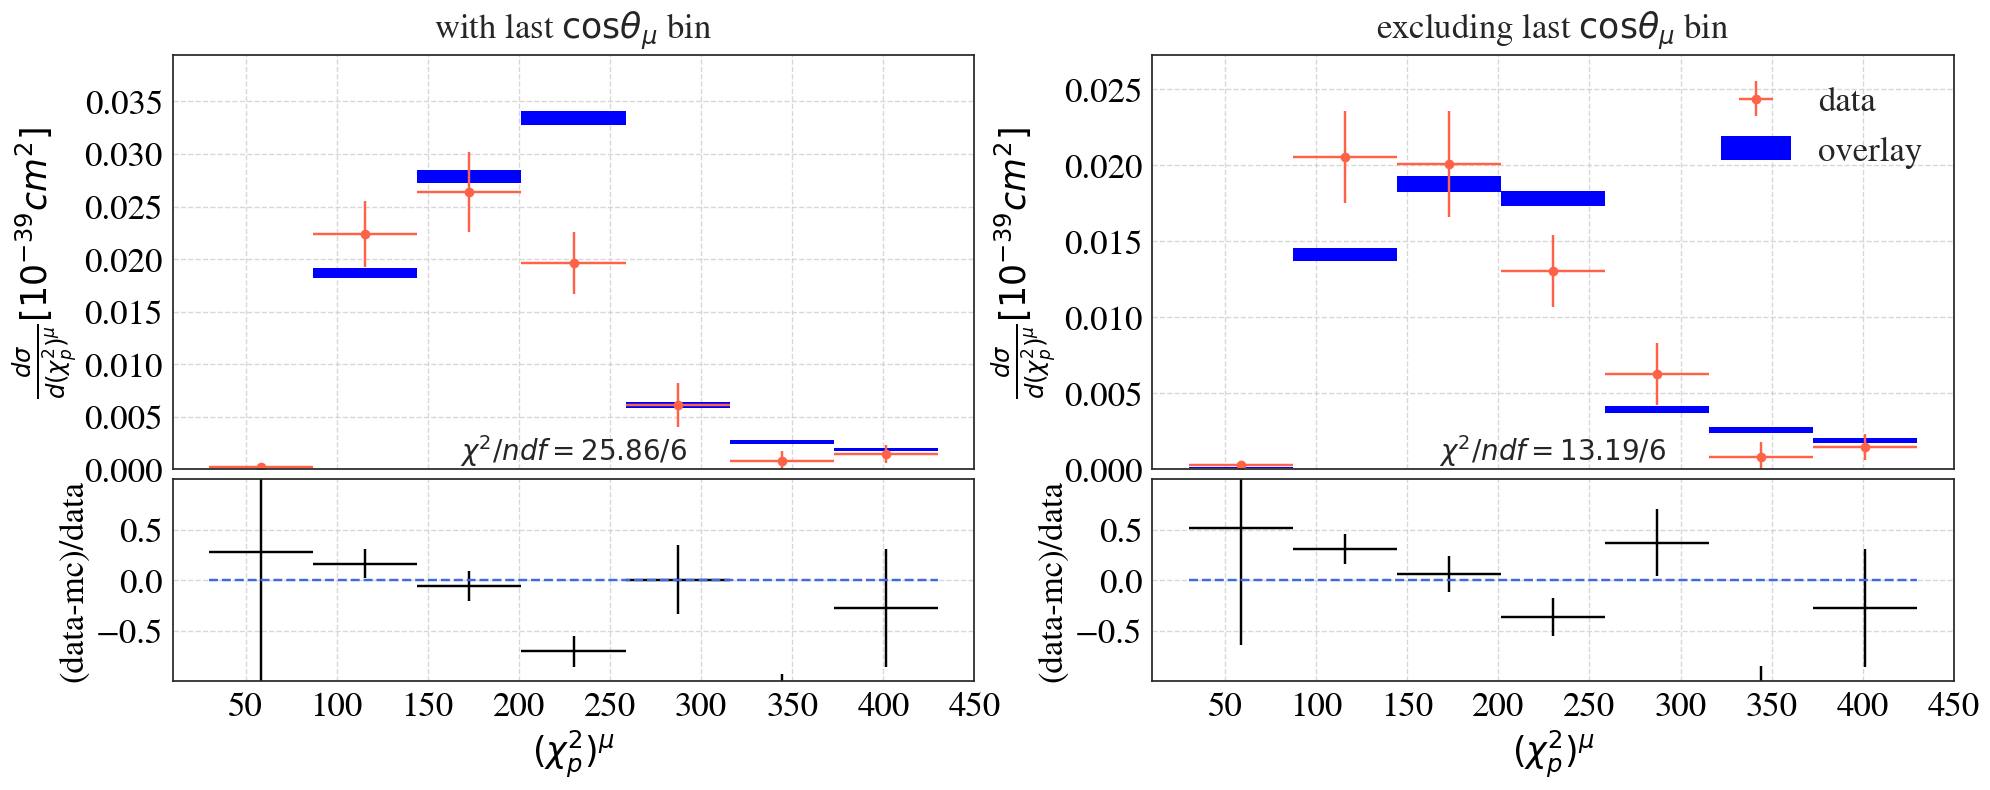

In [155]:
draw_Xsec_variable(var='pidcali_Chi2ProtonYplane_muCandidate',mul=1,bins=linspace(30,430,8),vlabel=r'(\chi^2_p)^{\mu}',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:75: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:77: RuntimeWarning: invalid value encountered in divide


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/pidcali_Chi2ProtonYplane_pCandidate_Xsec.pdf


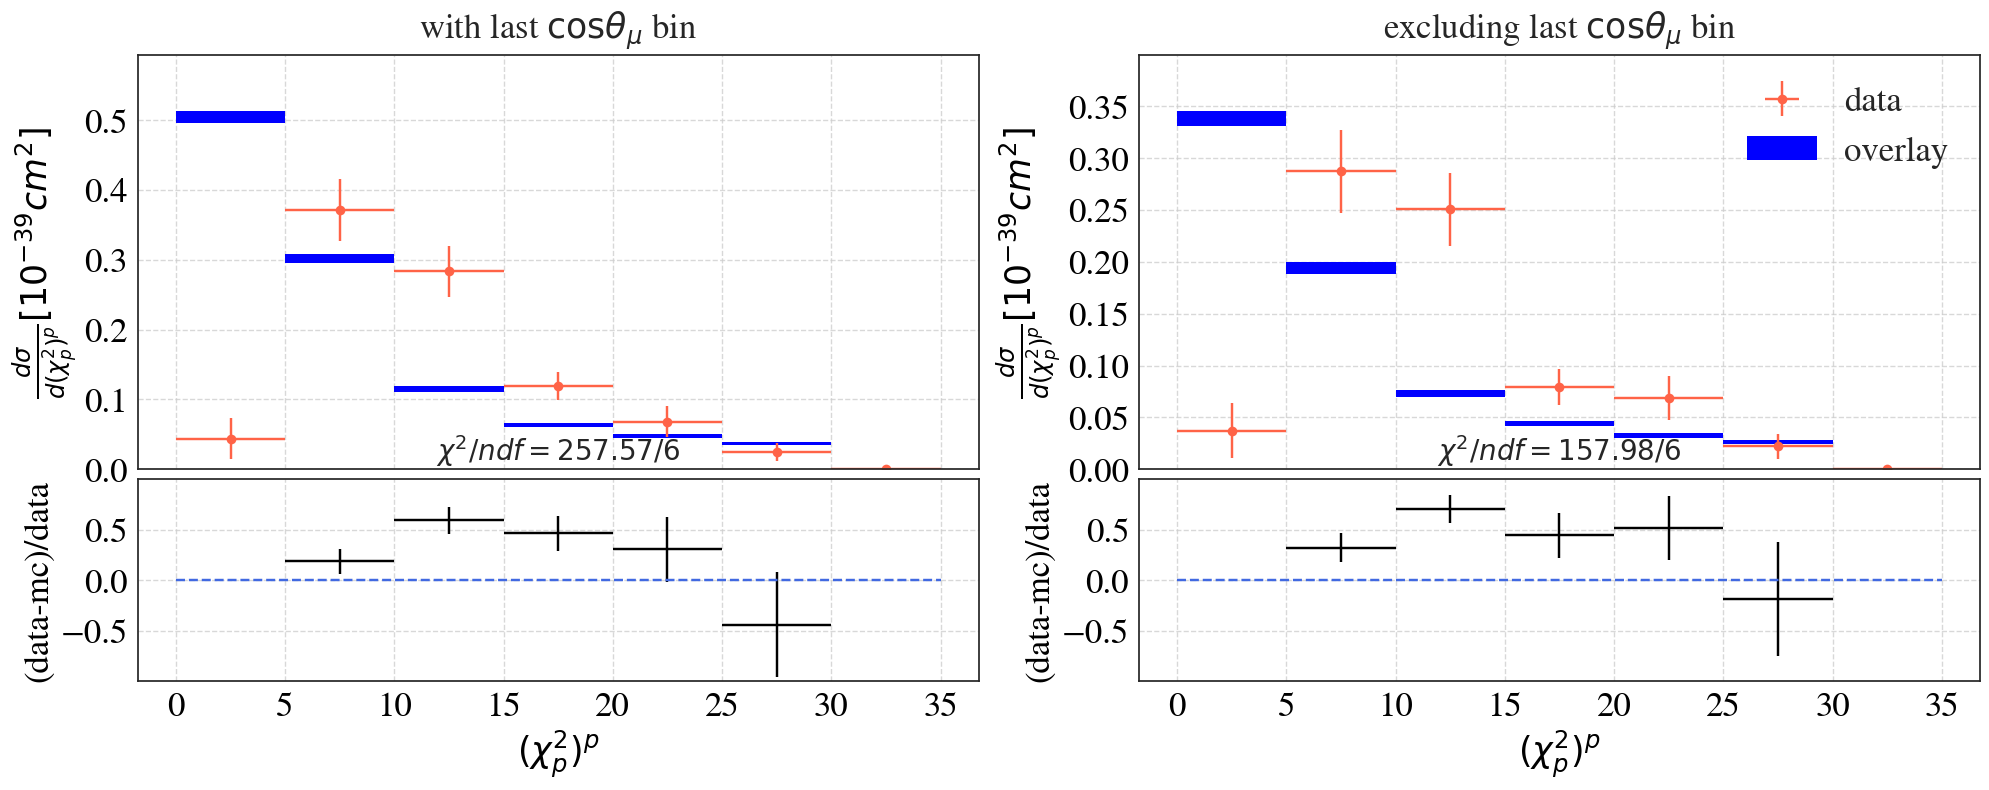

In [163]:
draw_Xsec_variable(var='pidcali_Chi2ProtonYplane_pCandidate',mul=1,bins=linspace(0.001,35,8),vlabel=r'(\chi^2_p)^{p}',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:75: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:77: RuntimeWarning: invalid value encountered in divide


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/Nflashes_Xsec.pdf


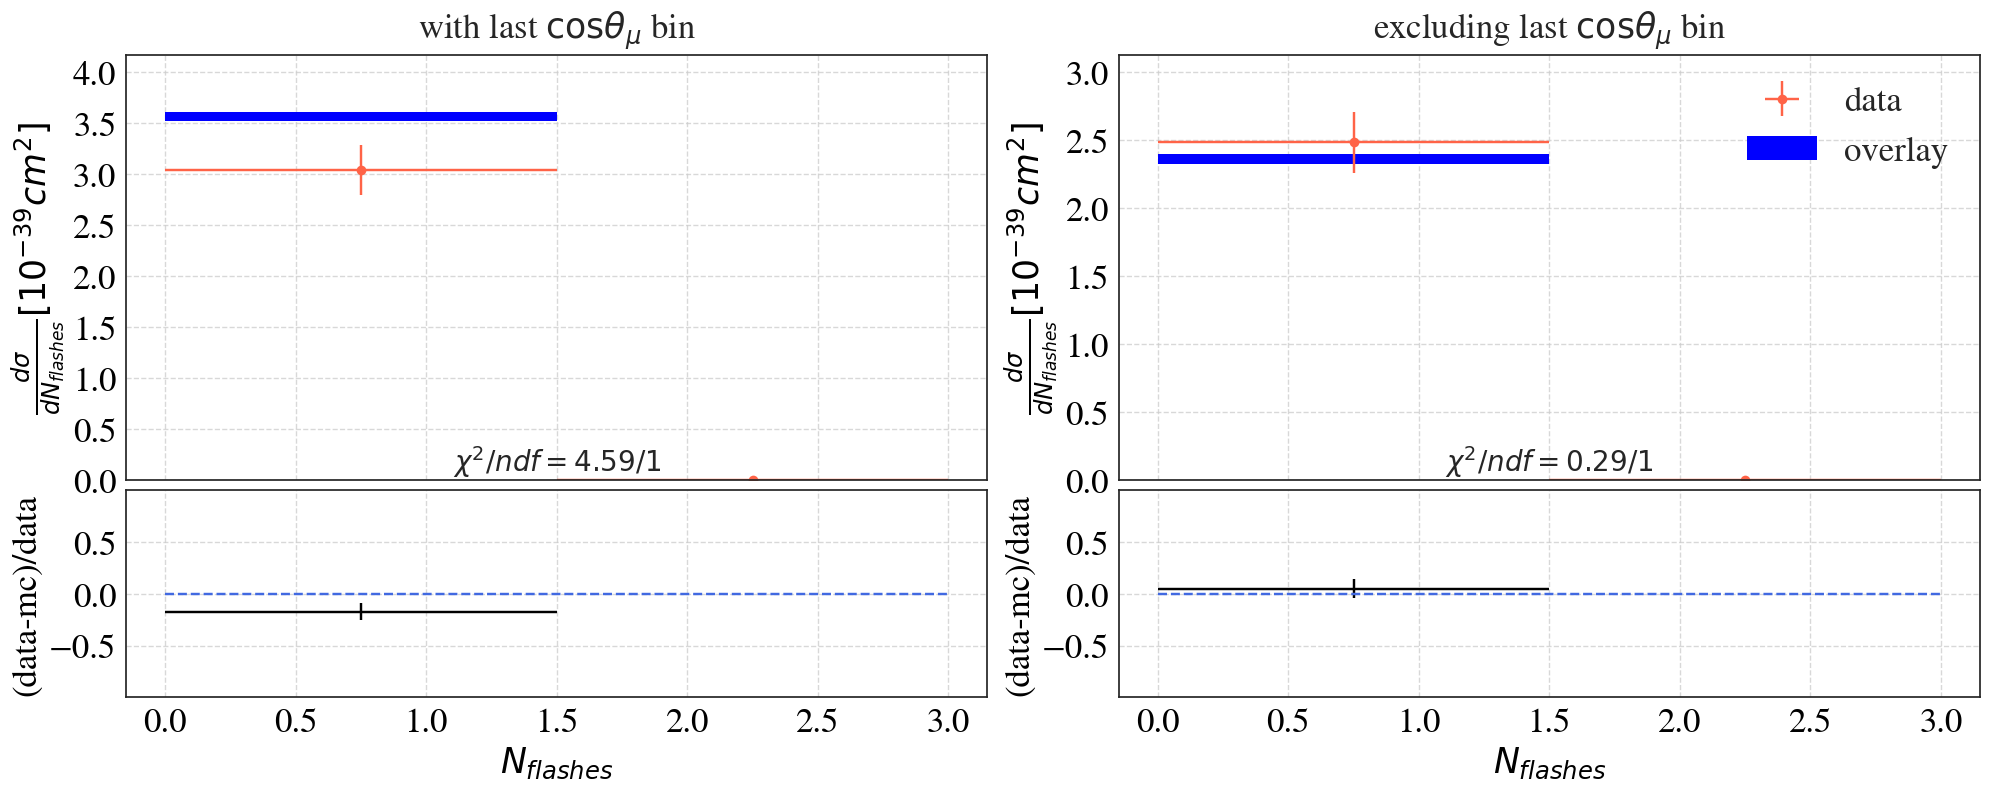

In [166]:
draw_Xsec_variable(var='Nflashes',mul=1,bins=linspace(0.001,3,3),vlabel=r'N_{flashes}',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/MatchedFlash_TotalPE_Xsec.pdf


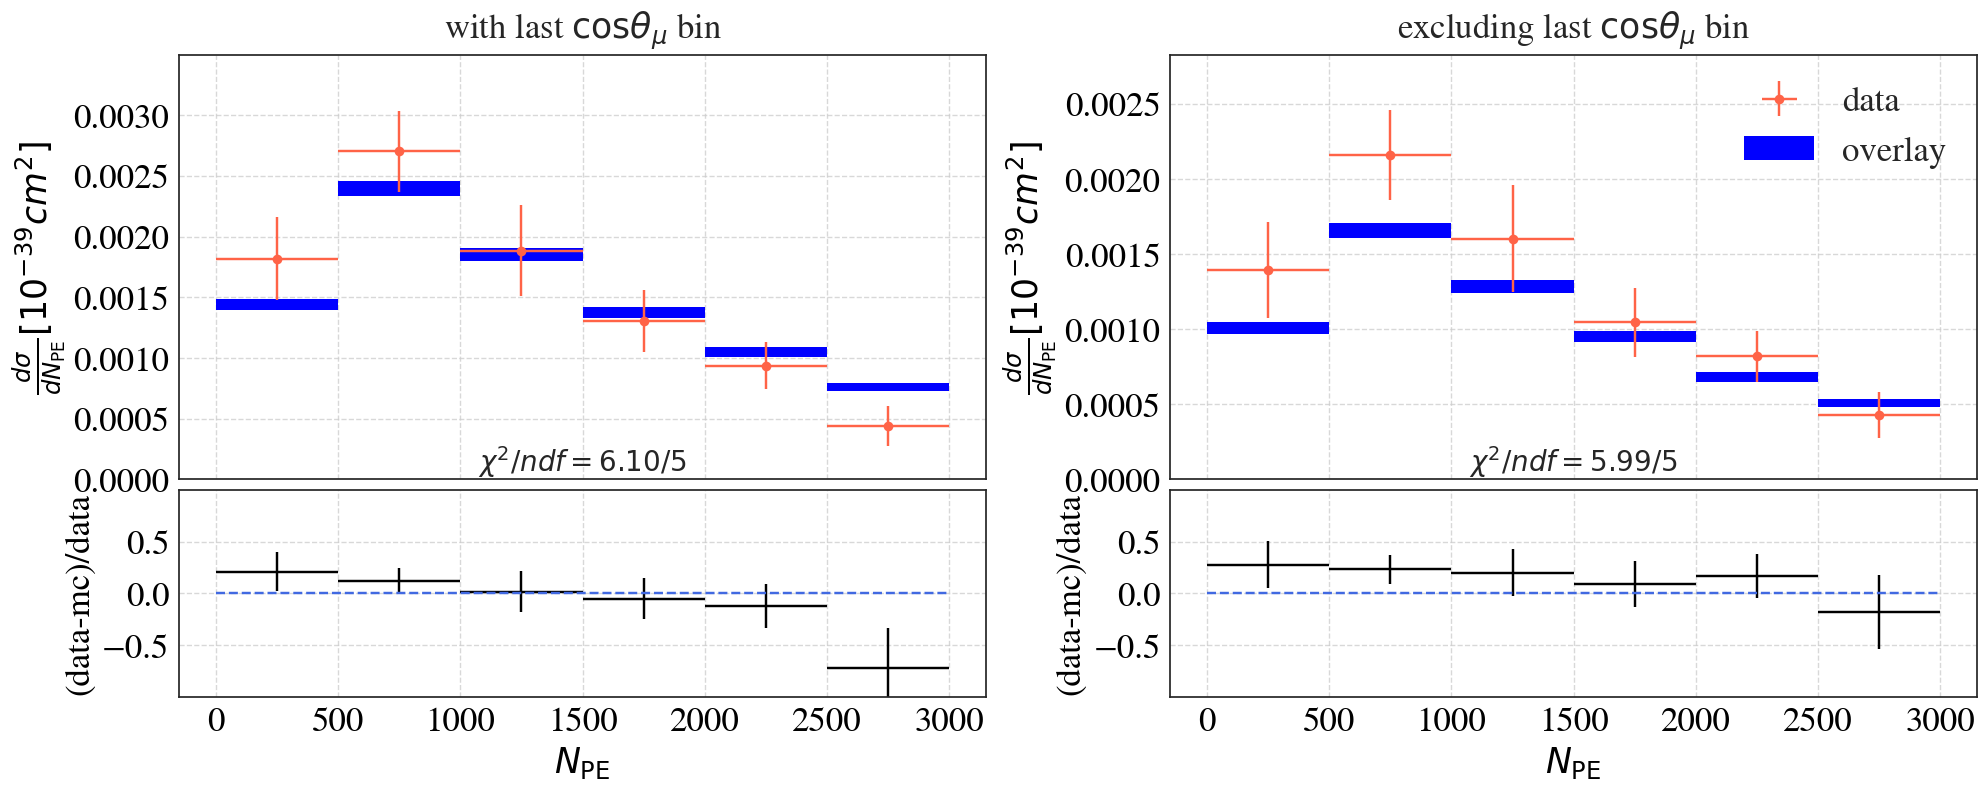

In [178]:
draw_Xsec_variable(var='MatchedFlash_TotalPE',mul=1,bins=linspace(0.001,3000,7),vlabel=r'N_{\mathrm{PE}}',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/MatchedFlash_YZdistance_Xsec.pdf


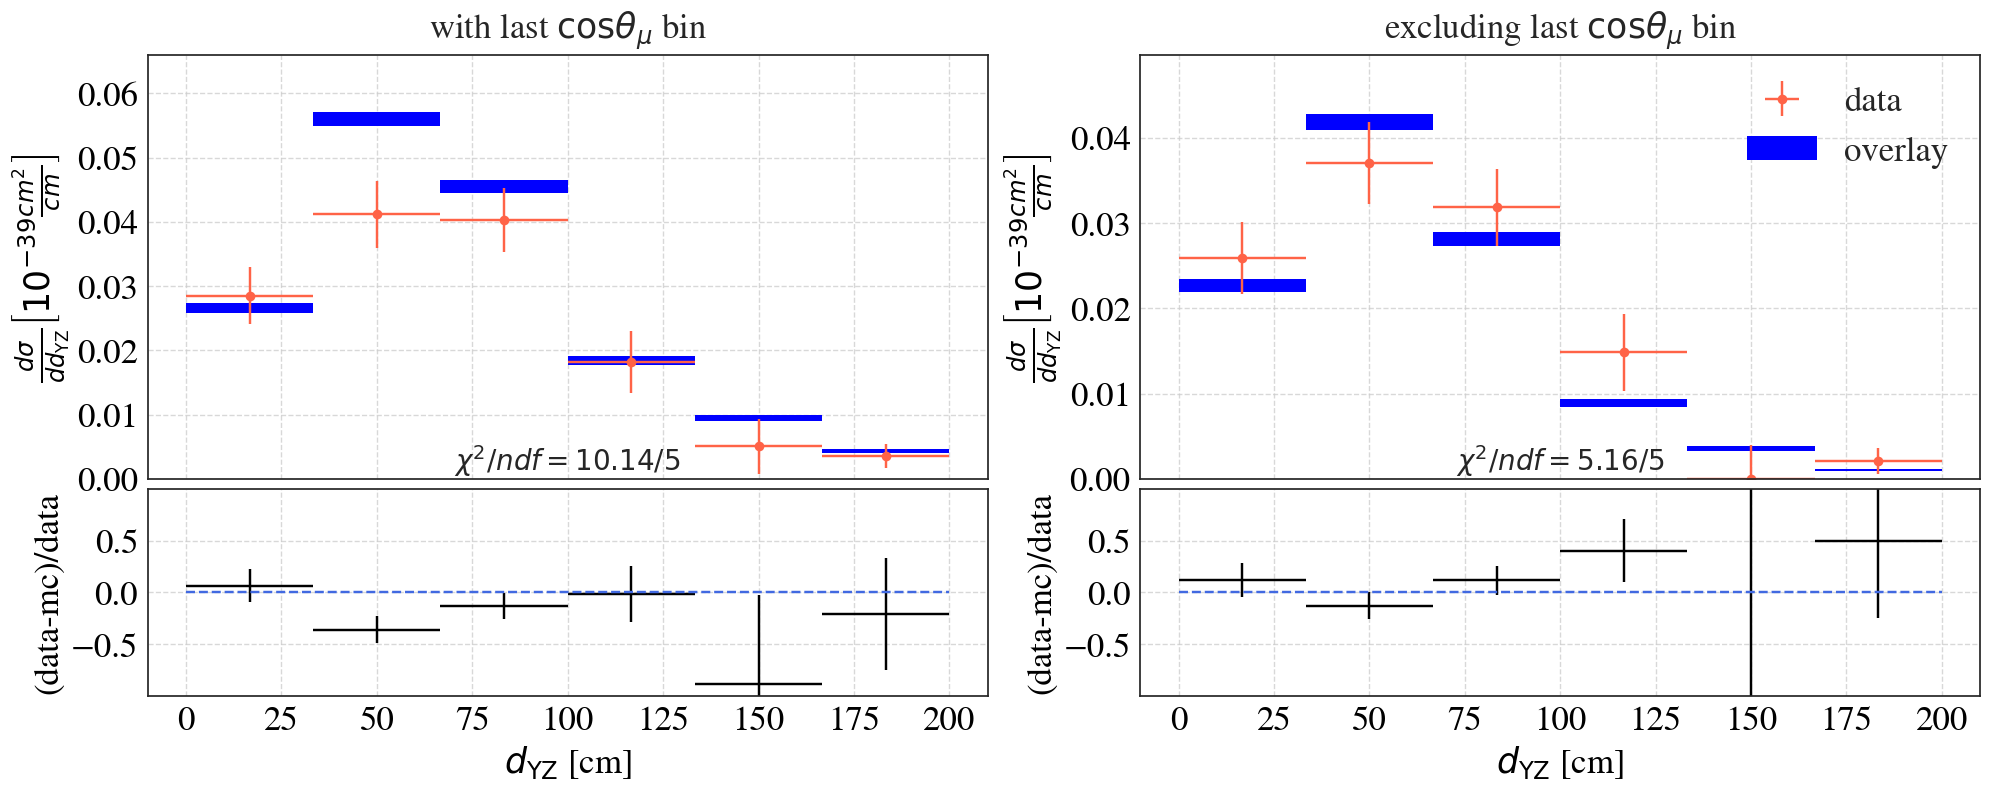

In [185]:
draw_Xsec_variable(var='MatchedFlash_YZdistance',mul=1,bins=linspace(0.001,200,7),vlabel=r'd_{\mathrm{YZ}}',units='cm',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/l_mu-l_p_Xsec.pdf


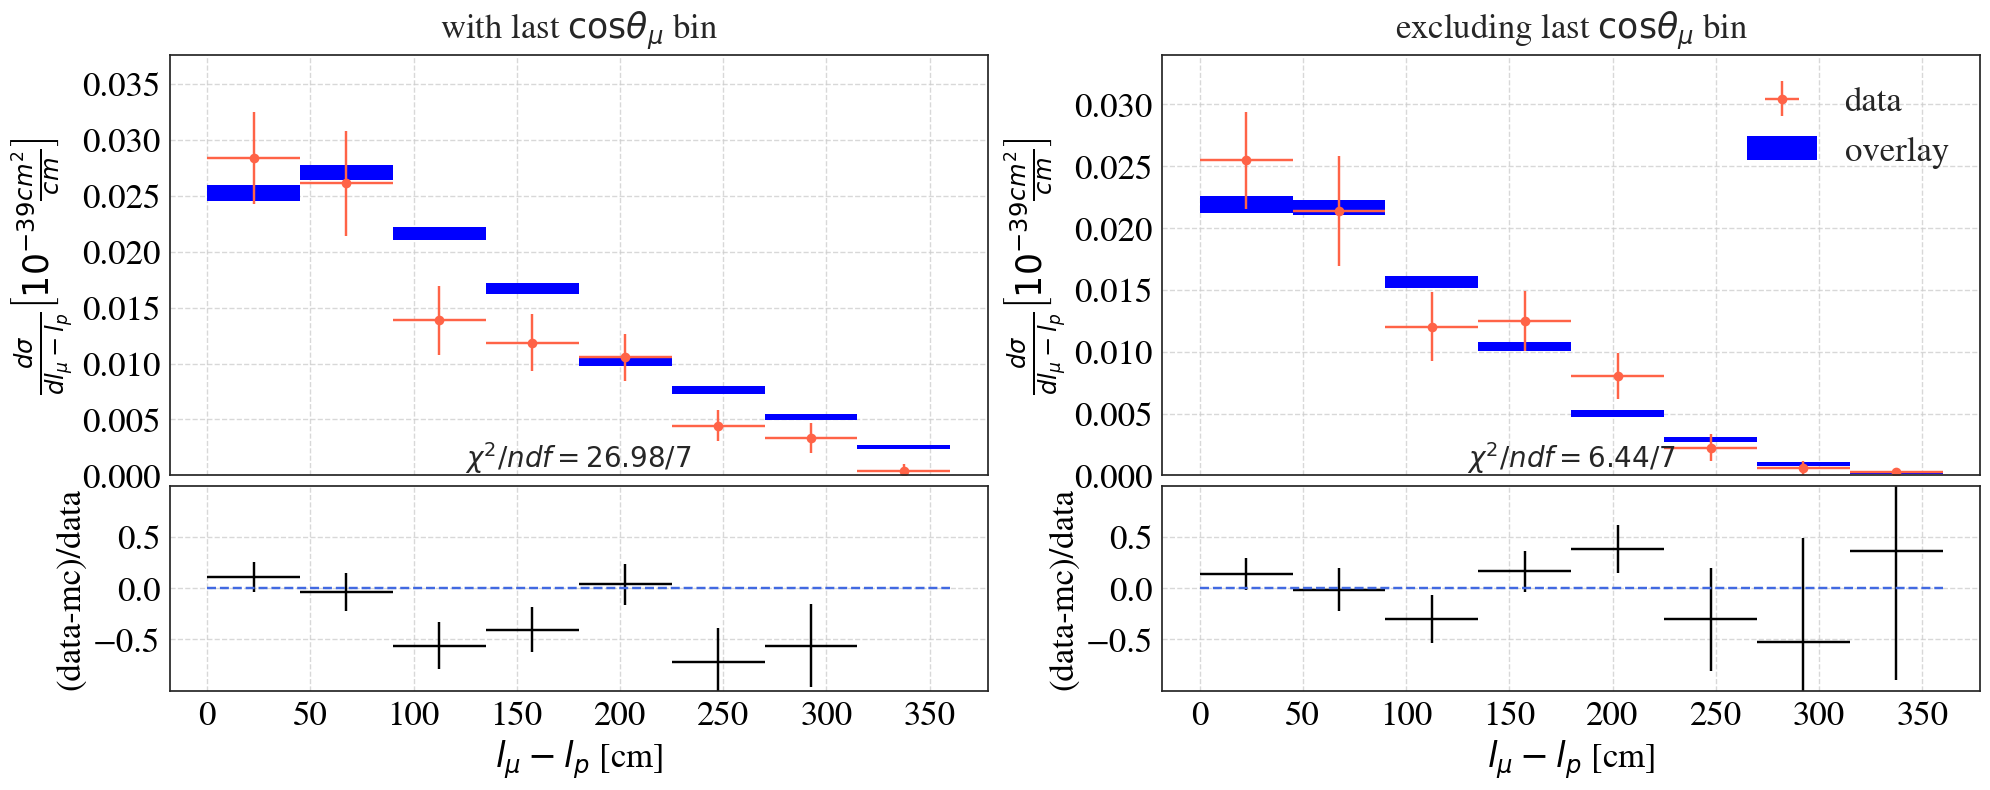

In [194]:
draw_Xsec_variable(var='l_mu-l_p',mul=1,bins=linspace(0,360,9),vlabel=r'l_\mu - l_p',units='cm',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/theta_12_Xsec.pdf


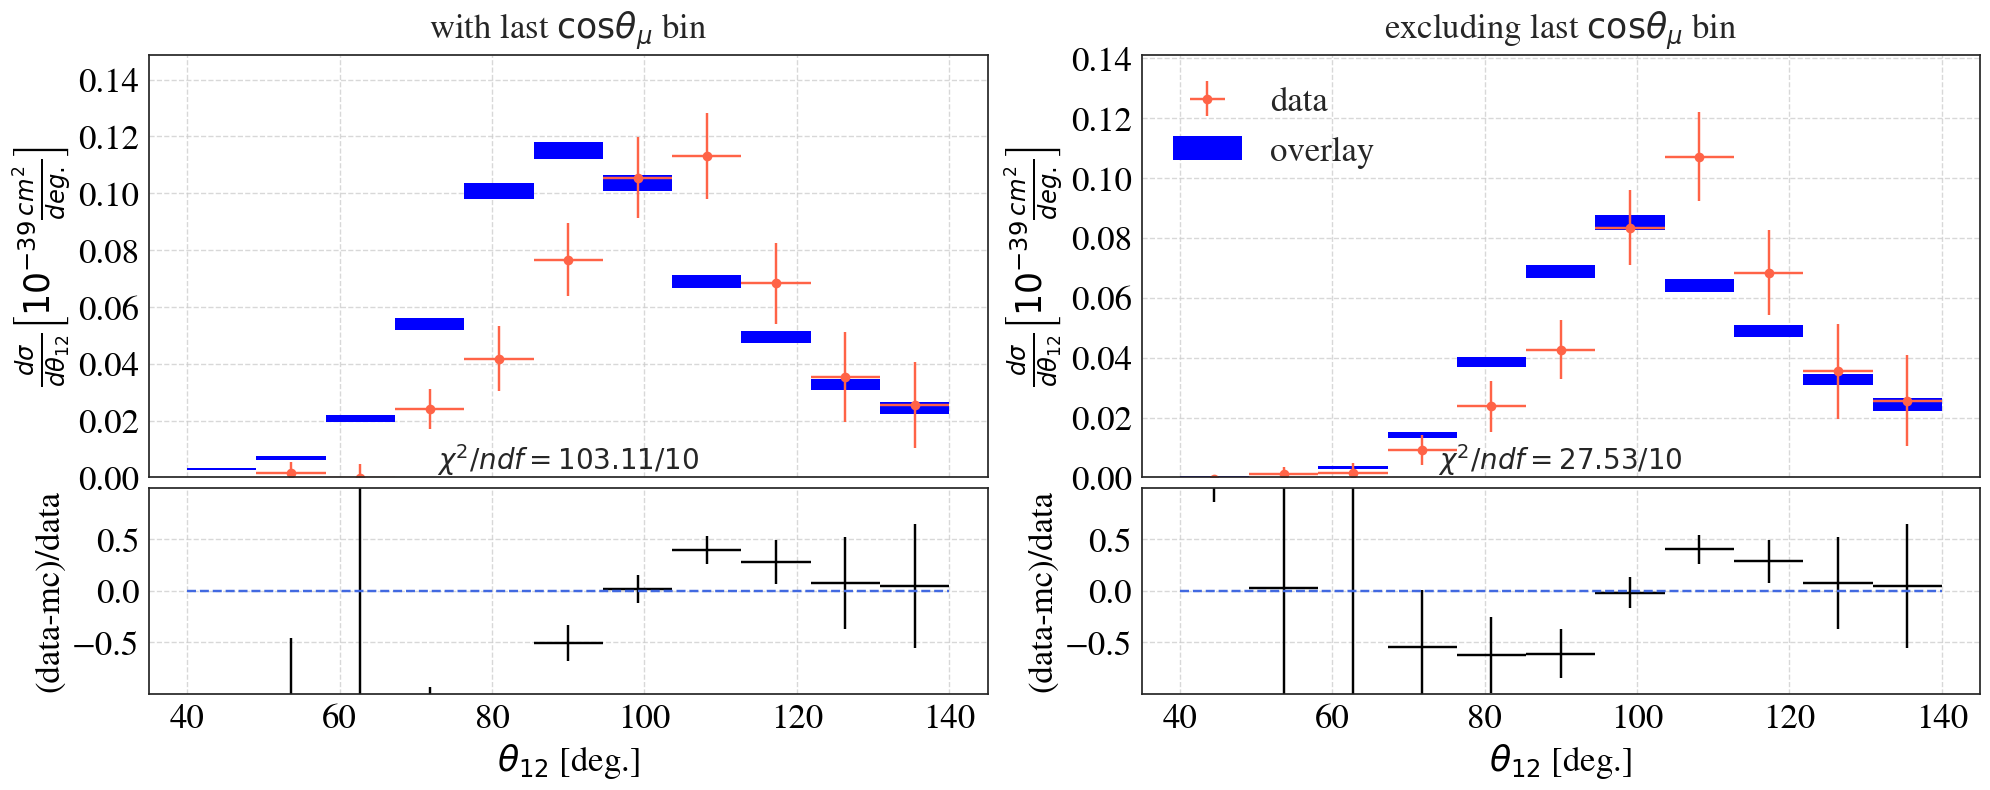

In [220]:
draw_Xsec_variable(var='theta_12',bins=linspace(40,140,12),vlabel=r'\theta_{12}',units='deg.',legend_loc='upper left',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/RdQ_plane0_Xsec.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/RdQ_plane1_Xsec.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/RdQ_plane2_Xsec.pdf


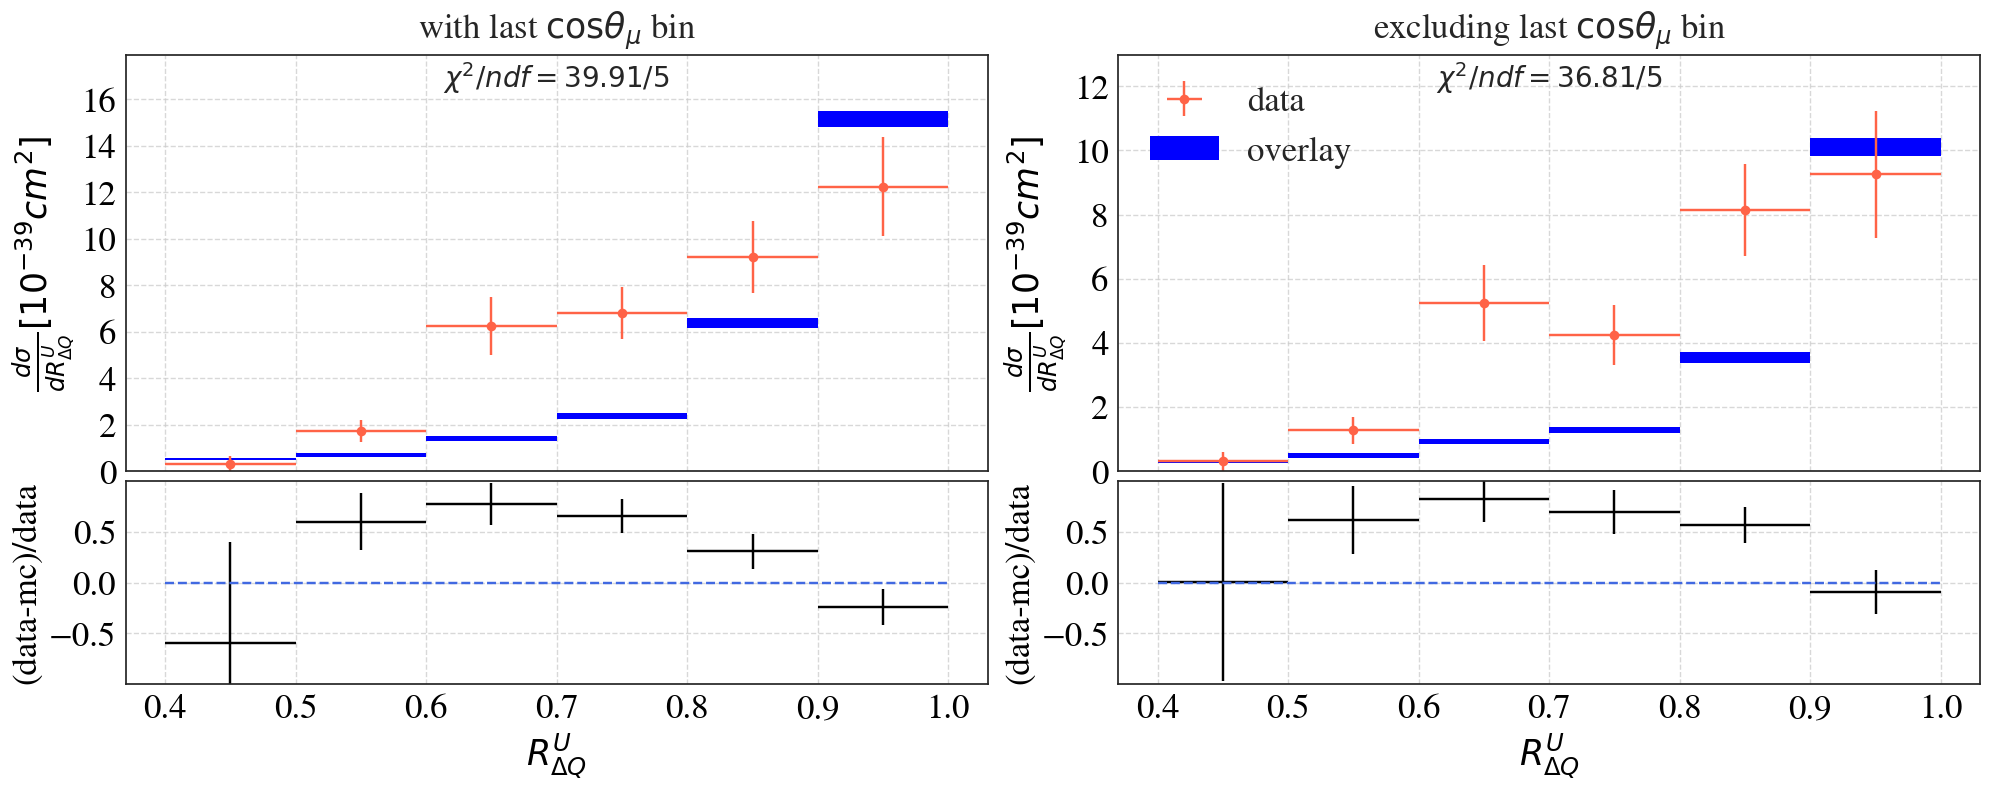

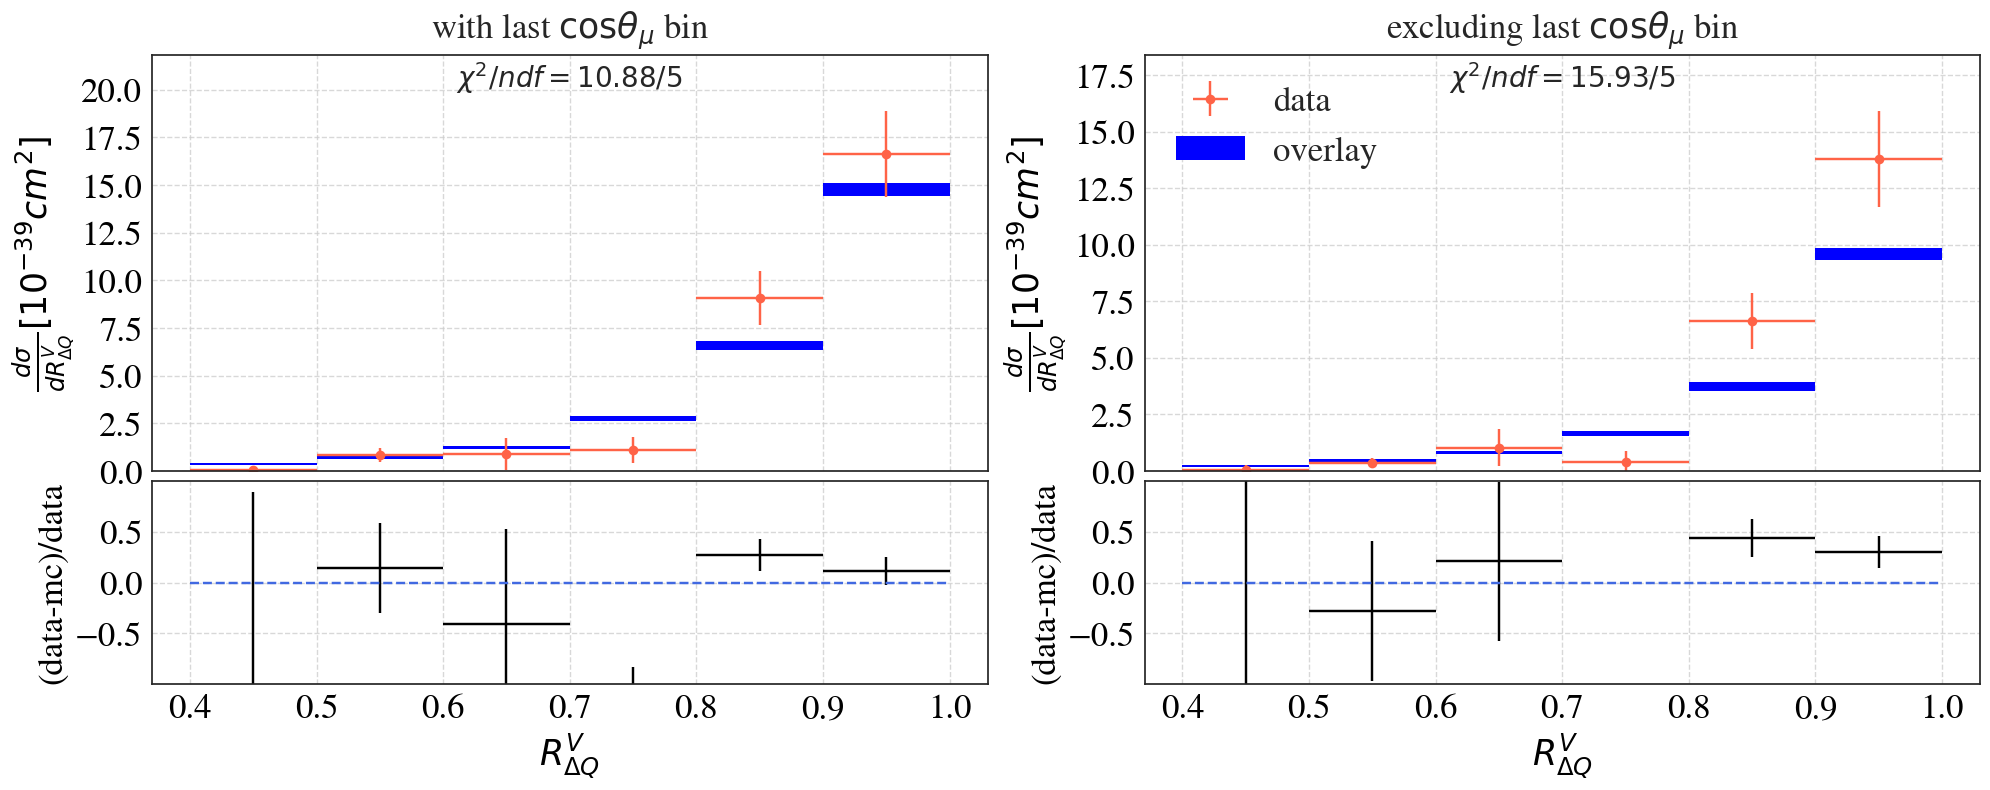

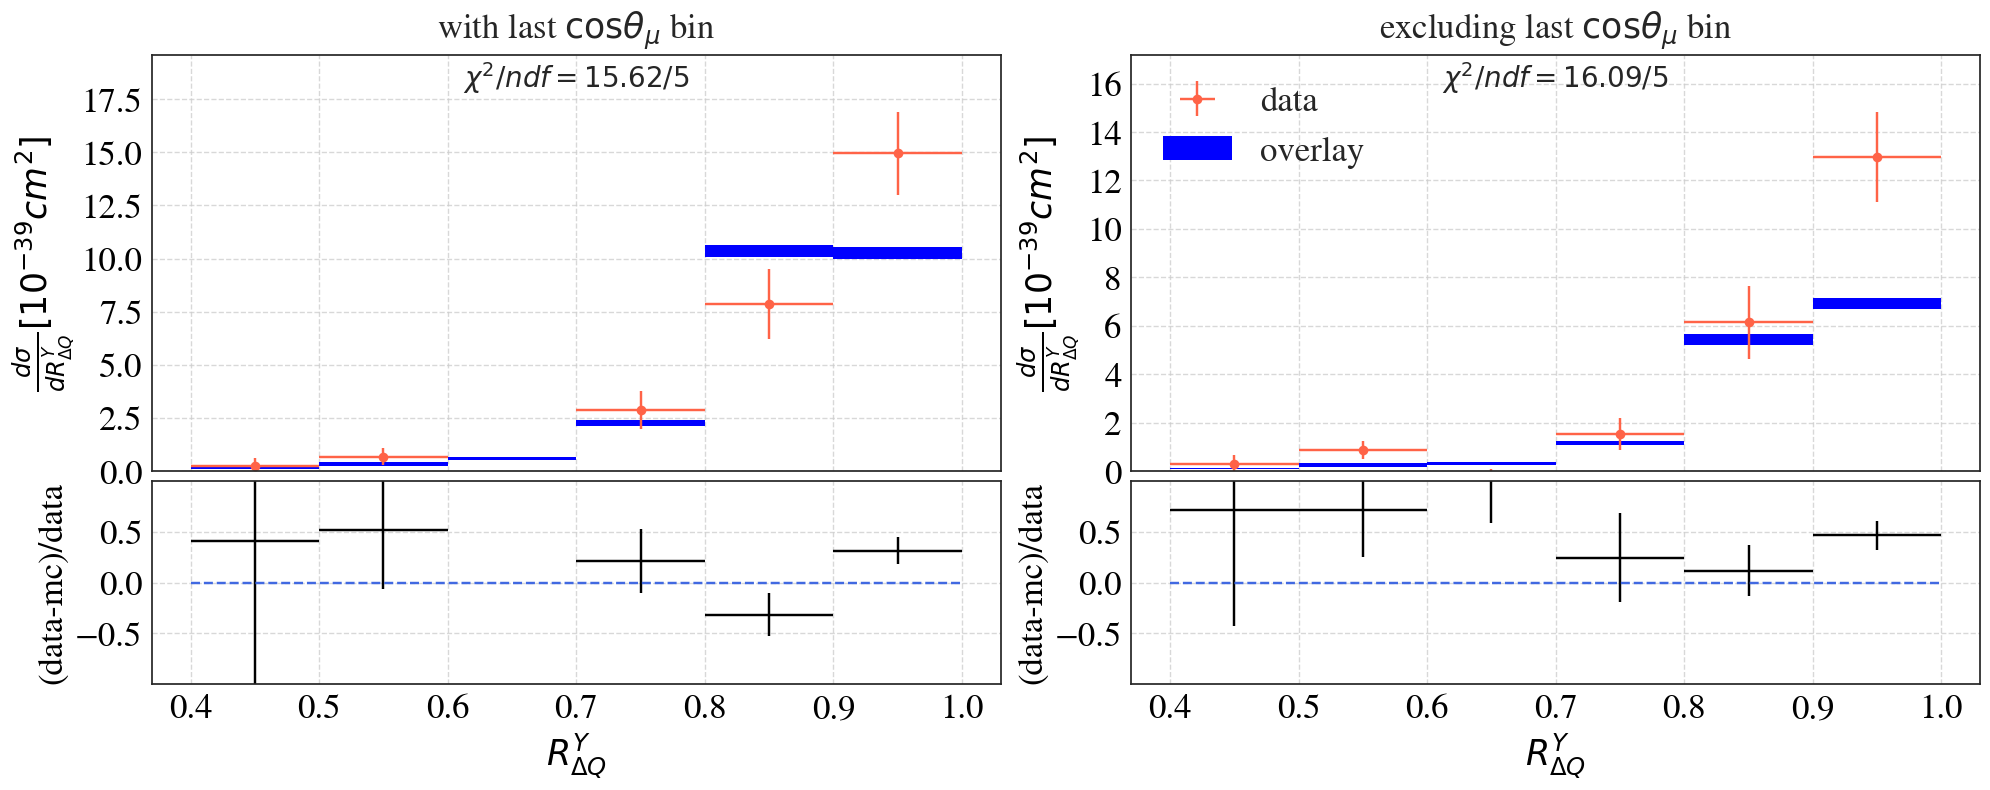

In [240]:
R_str,box_str = 'RdQaroundVertex','[%d wires x %d ticks]'%(50,100)
Ru,Rv,Ry = R_str+'[plane 0]'+box_str,R_str+'[plane 1]'+box_str,R_str+'[plane 2]'+box_str

draw_Xsec_variable(var=Ru,bins=linspace(0.4,1,7),vlabel=r'R_{\Delta Q}^{U}',residuals_ytitle=2.9,filename='RdQ_plane0_Xsec',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);
draw_Xsec_variable(var=Rv,bins=linspace(0.4,1,7),vlabel=r'R_{\Delta Q}^{V}',residuals_ytitle=2.9,filename='RdQ_plane1_Xsec',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);
draw_Xsec_variable(var=Ry,bins=linspace(0.4,1,7),vlabel=r'R_{\Delta Q}^{Y}',residuals_ytitle=2.9,filename='RdQ_plane2_Xsec',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/reco_Pt_Xsec.pdf


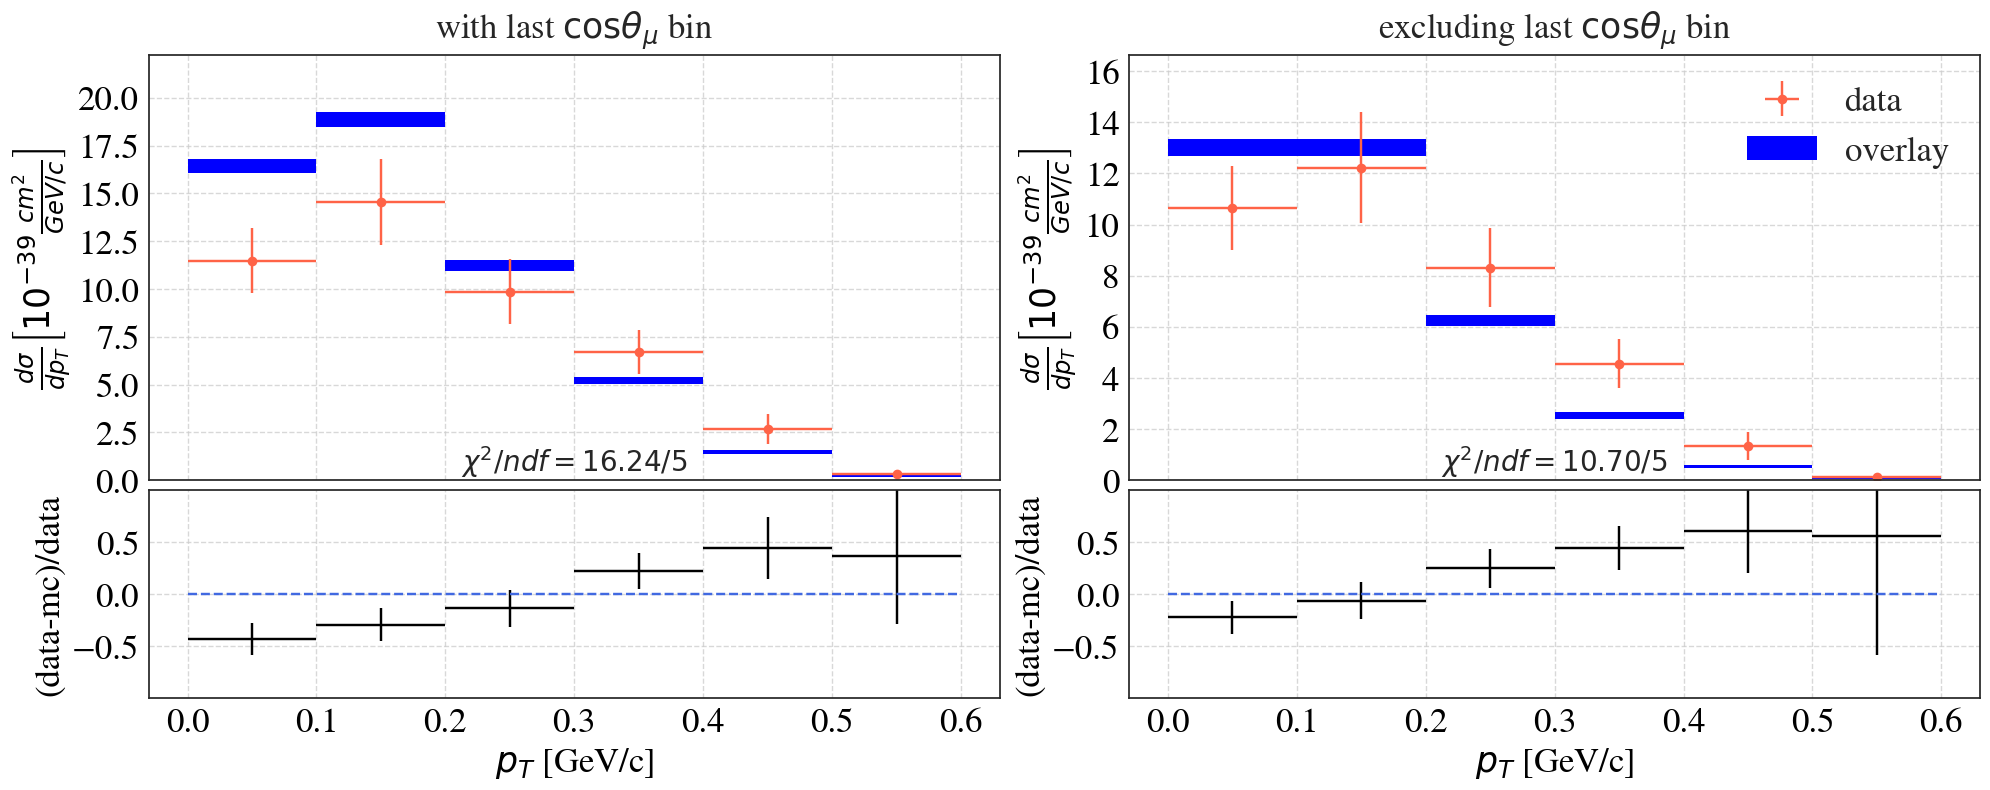

In [142]:
draw_Xsec_variable(var='reco_Pt',bins=linspace(0,0.6,7),vlabel=r'p_T',units='GeV/c',debug=0,
                      wname='Pmu weight',                       
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p);

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/delta_phi_Xsec.pdf


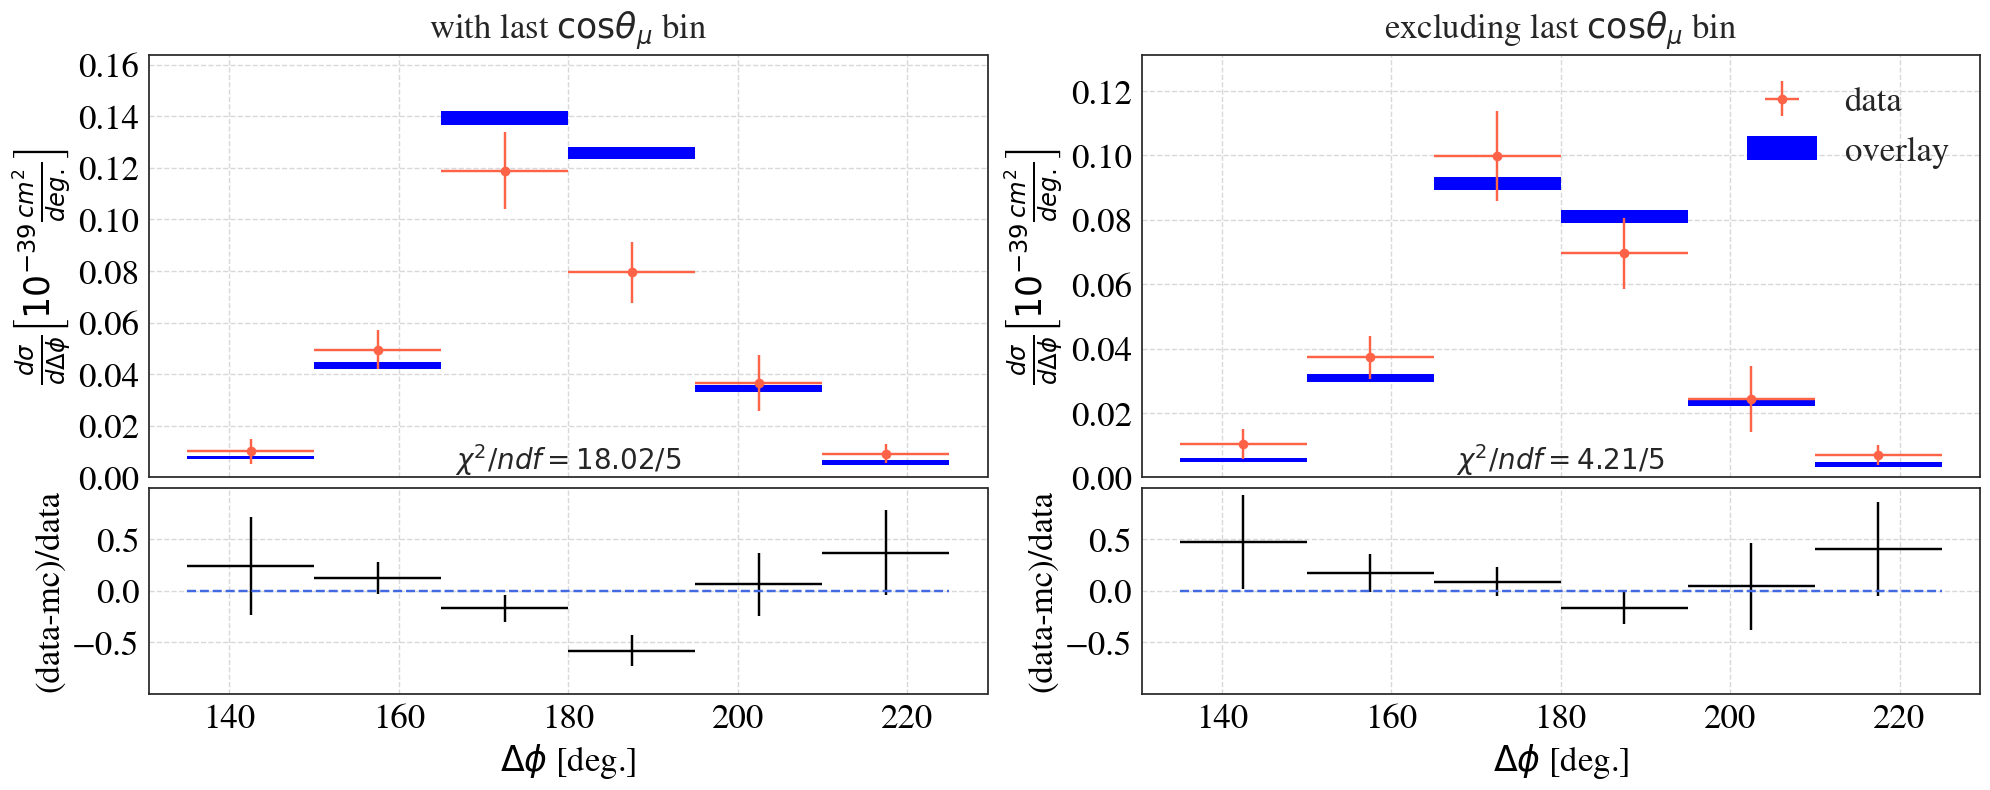

In [115]:
draw_Xsec_variable(var='delta_phi',mul=1,bins=linspace(135,225,7),vlabel=r'\Delta \phi',units='deg.',
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0);